# Spatial Data Reconstruction
`climatrix` provides tools for reconstructing spatial fields from sparse data onto a dense grid (or another sparse grid) using various methods, such as:
- Inverse Distance Weighting (IDW)
- Ordinary Kriging (OK)
- SIREN (Sinusoidal Representation Networks)

This notebook presents examples of how to use these methods.

In [1]:
import climatrix as cm
import xarray as xr

## Loading a Dataset

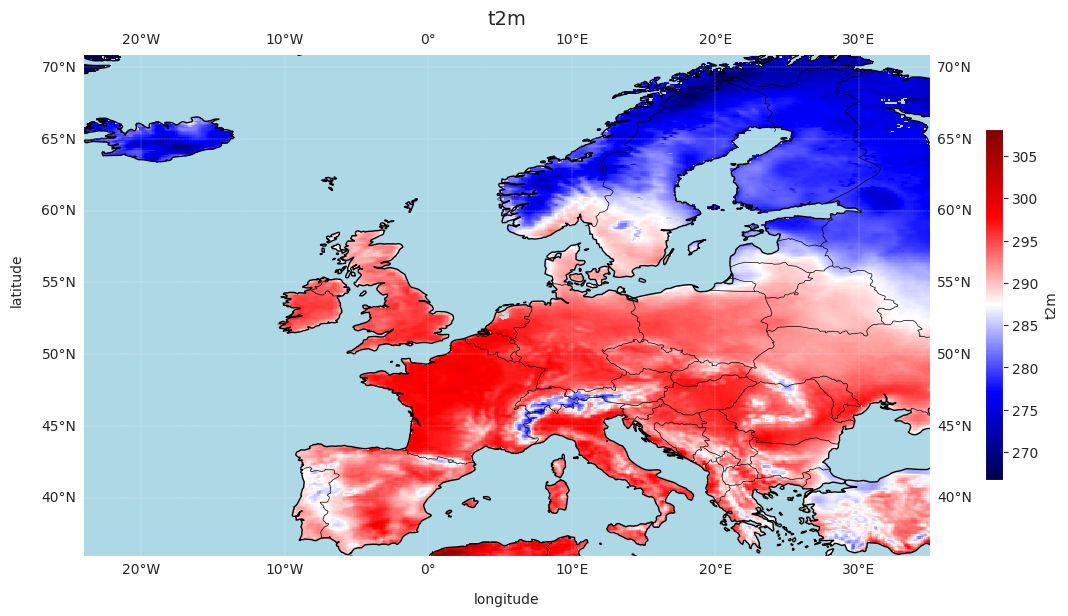

<GeoAxes: title={'center': 't2m'}>

In [2]:
xr_dset = xr.open_dataset("data.nc")
europe = (
    xr_dset.cm.to_signed_longitude()
    .subset(north=71, south=36, west=-24, east=35)
)
europe.plot()

## Sampling training data

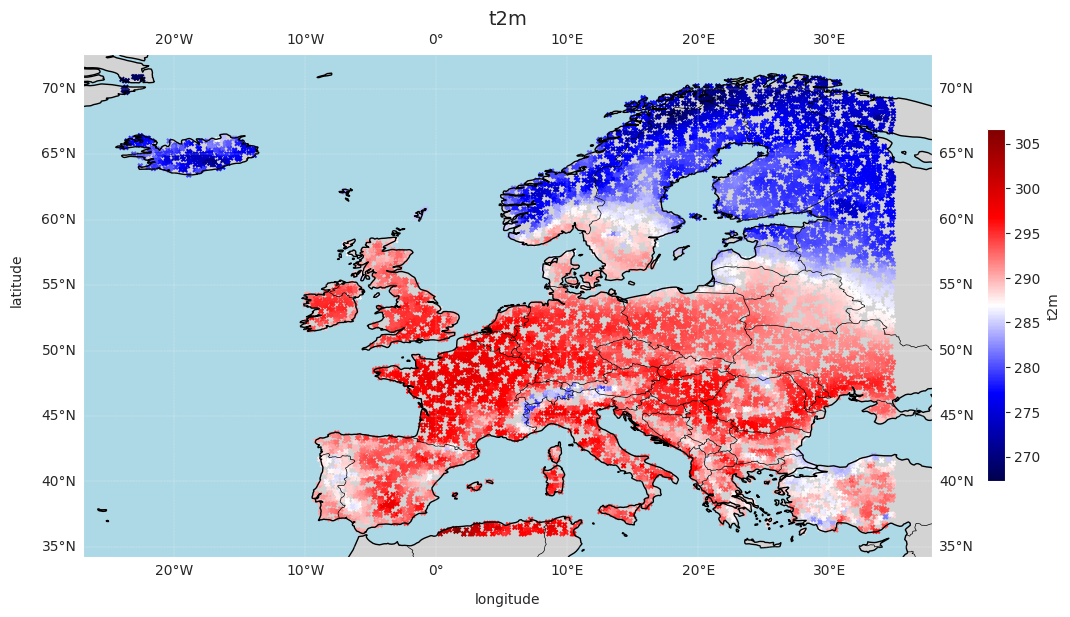

<GeoAxes: title={'center': 't2m'}>

In [3]:
sparse = europe.sample_uniform(number=10_000, nan="resample")
sparse.plot()

## Reconstruction using the IDW (Inverse Distance Weighting) method

In [5]:
cm_reconstructed_idw = sparse.reconstruct(
    target=europe.domain,
    method='idw', 
    k=7,
)


masked_nans = cm_reconstructed_idw.mask_nan(europe)
masked_nans.plot()

ValueError: cannot align objects with join='exact' where index/labels/sizes are not equal along these coordinates (dimensions): 'latitude' ('latitude',)

## Reconstruction using the Ordinary Kriging (OK) method

In [ ]:
cm_reconstructed_kriging = sparse.reconstruct(
    target=europe.domain,
    method='ok',
)

without_nans = cm_reconstructed_kriging.mask_nan(europe)
without_nans.plot()

## Reconstruction using the SIREN (Sinusoidal Representation Networks) method

26-05-2025 19:02:49 WARNING | climatrix.reconstruct.siren.siren | CUDA is not available, falling back to CPU.
26-05-2025 19:02:49 INFO | climatrix.reconstruct.siren.dataset | Created 3D points from coordinates and values: (10000, 3)
26-05-2025 19:02:51 INFO | climatrix.reconstruct.siren.dataset | Normalized 3D on-surface points.
26-05-2025 19:02:51 INFO | climatrix.reconstruct.siren.dataset | Created dataset with 1024 total on-surface points
26-05-2025 19:02:51 INFO | climatrix.reconstruct.siren.siren | Initializing 3D SIREN model
26-05-2025 19:02:51 INFO | climatrix.reconstruct.siren.siren | No checkpoint provided or checkpoint not found. Starting training from scratch.
26-05-2025 19:02:51 INFO | climatrix.reconstruct.siren.siren | Training 3D SIREN model (SDF loss)...
26-05-2025 19:02:51 INFO | climatrix.reconstruct.siren.siren | Configuring Adam optimizer with learning rate: 0.000100


/home/ketiovv/studia/projekty/climatrix/src/climatrix/reconstruct/siren/dataset.py:91: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.points_3d = torch.tensor(self.points_3d, dtype=torch.float32)


26-05-2025 19:02:52 INFO | climatrix.reconstruct.siren.siren | Epoch 1/100: Total Loss = 145.654573
26-05-2025 19:02:52 INFO | climatrix.reconstruct.siren.siren |  Loss Components: {'sdf': 71.28645663791232, 'inter': 7.049599171098736, 'normal_constraint': 33.69209077623155, 'grad_constraint': 33.626425425211586}
26-05-2025 19:03:26 INFO | climatrix.reconstruct.siren.siren | Epoch 100/100: Total Loss = 27.872277
26-05-2025 19:03:26 INFO | climatrix.reconstruct.siren.siren |  Loss Components: {'sdf': 10.310115178426107, 'inter': 2.7106127738952637, 'normal_constraint': 6.582076655493842, 'grad_constraint': 8.269473181830513}
26-05-2025 19:03:26 INFO | climatrix.reconstruct.siren.siren | Training finished.
26-05-2025 19:03:26 INFO | climatrix.reconstruct.siren.siren | Checkpoint saving skipped as no checkpoint path is provided.
26-05-2025 19:03:26 INFO | climatrix.reconstruct.siren.siren | Querying 3D SIREN model on target domain...
26-05-2025 19:03:28 INFO | climatrix.reconstruct.siren.

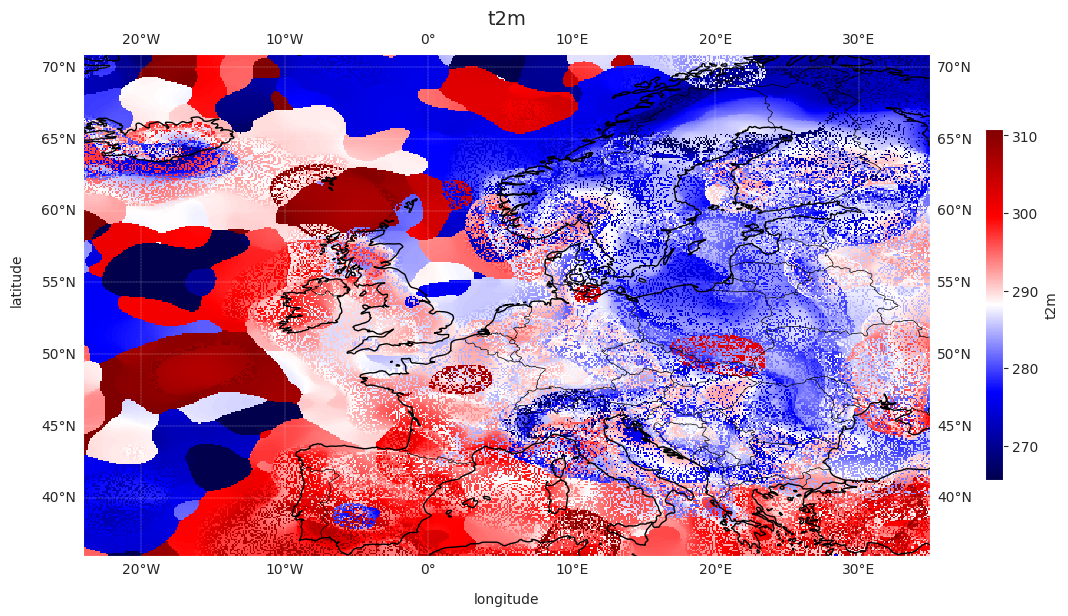

ValueError: cannot align objects with join='exact' where index/labels/sizes are not equal along these coordinates (dimensions): 'latitude' ('latitude',)

In [19]:
siren_dense = sparse.reconstruct(
    europe.domain,
    method="siren",
    num_epochs=1000
)
siren_dense.plot()

without_nans = siren_dense.mask_nan(europe)
without_nans.plot()
